In [32]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

#  1.) Who was being polled and what was their party affiliation?
#  2.) Did the poll results favor Romney or Obama?
#  3.) How do undecided voters effect the poll?
#  4.) Can we account for the undecided voters?
#  5.) How did voter sentiment change over time?
#  6.) Can we see an effect in the polls from the debates?

In [33]:
url = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
#using request to get info from url and getting it as text
source = requests.get(url).text

poll_data = StringIO(source)

In [34]:
poll_df = pd.read_csv(poll_data)

In [35]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [36]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


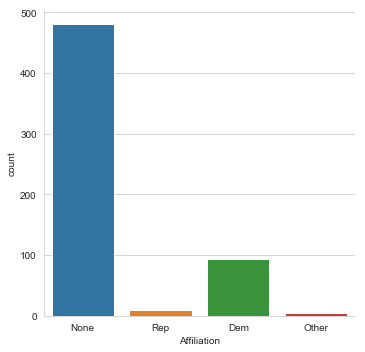

In [37]:
# Lets get a quick visualization of affiliation of the polls (partisan or not)
sns.catplot('Affiliation',kind = 'count',data=poll_df)

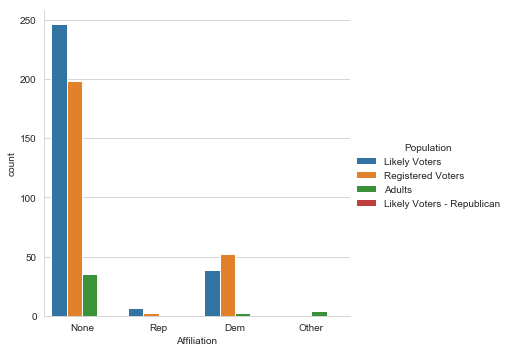

In [38]:
sns.catplot('Affiliation',kind='count',data=poll_df,hue='Population')

In [39]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


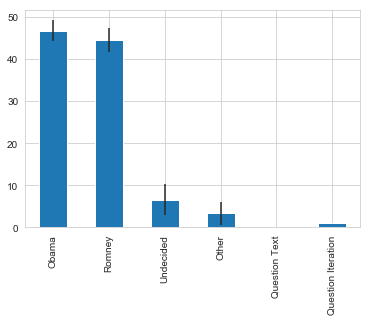

In [40]:
#Lets take averages for Obama, Romney, and Undecided
avg = pd.DataFrame(poll_df.mean())

avg.drop('Number of Observations',axis=0,inplace=True)

std = DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

avg.plot(yerr=std,kind='bar',legend=False)

In [41]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN


In [42]:
#Let's get standard deviation now
std = DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)

In [43]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN


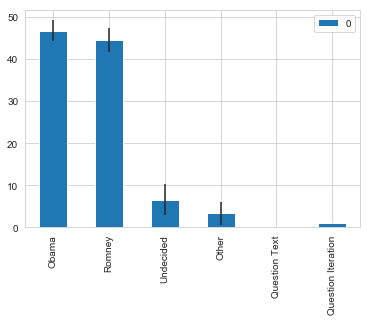

In [44]:
#Let's plot a bar graph
avg.plot(yerr=std,kind='bar',legend=True)
# According to this graph, undecided would really make a big difference

In [45]:
#poll avg
poll_avg = pd.concat([avg,std],axis=1)
#Left column is Average and Right is Standard Deviation STD
poll_avg.head()

,0,0
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN


In [46]:
# Lets do a quick time series of voter sentiment (dates of the polls) throught ime

In [47]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


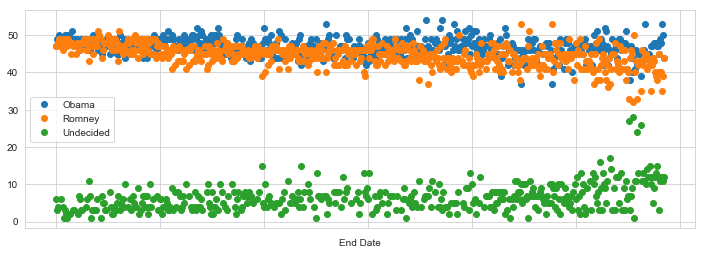

In [48]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o',legend=True,figsize=(12,4))
#DATES Labels NOT SHOWING

In [49]:
from datetime import datetime

In [50]:
#define new column DF to see difference 
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [51]:
#positive difference indicates obama, negative indicates romney is winning poll
# as index will keep 0,1,2,3,4 as opposed to using the start date as indexes.
# take DF , keep indexes, then take averages on the whole list of polls
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


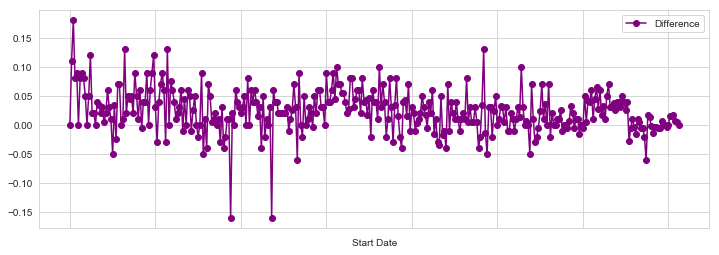

In [52]:
# Now lets plot the difference / time
poll_df.plot('Start Date','Difference', figsize = (12,4),marker='o',linestyle='-',color='purple')

In [53]:
row_in = 0
xlimit = []
#made for loop for every date in that start date column
# if the first 7 terms = october 2012
# append to x limit empty list, that row index and add 1 to row index to keep count going
# otherwise if it didnt find, just add 1 to row index
# have xlimit be a list  of basically index of entire month of october
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
#row in is counting index row

print(min(xlimit))
print(max(xlimit))

325
352


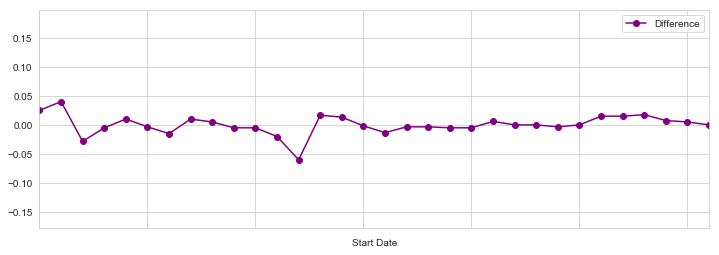

In [54]:
poll_df.plot('Start Date','Difference', figsize = (12,4),marker='o',linestyle='-',color='purple',xlim=(325,356))

In [55]:
#trouble getting X label ticks

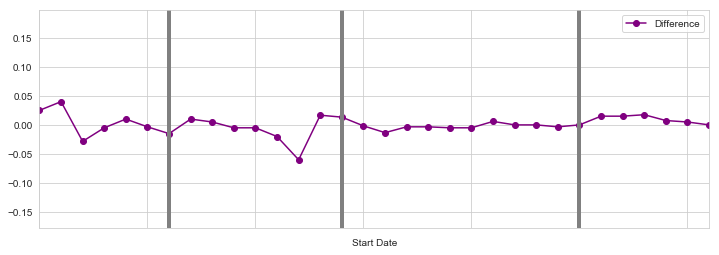

In [56]:
poll_df.plot('Start Date','Difference', figsize = (12,4),marker='o',linestyle='-',color='purple',xlim=(325,356))

#OCt 3rd
plt.axvline(x=329+2, linewidth=4, color='grey')
#October 11
plt.axvline(x=329+10, linewidth=4, color='grey')
#October 22
plt.axvline(x=329+21, linewidth=4, color='grey')

In [57]:
#Donor data set
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [59]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [60]:
#counts each unique value count, most often a certain exact amount was donated
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [62]:
#there are over 8000 different amounts donoated, lets get the mean.
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print('The average donation was %.2f with a std %.2f'  %(don_mean,don_std))

The average donation was 298.24 with a std 3749.67


In [70]:
#this is a huge standard deviation.  this might be being caused by some massive donations.
top_donor = donor_df['contb_receipt_amt'].copy()
#lets copy this column and then sort by highest
top_donor.sort_values()
top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
22         2500.0
23         2500.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
            ...  
1001701    2500.0
1001702    2500.0
1001703   -2500.0
1001704   -2500.0
1001705    1000.0
1001706    2500.0
1001707   -2500.0
1001708    2500.0
1001709   -2500.0
1001710   -2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724     500.0
1001725   

In [73]:
#going to get rid of the negative value (refund values)

top_donor = top_donor[top_donor >0]

In [75]:
top_donor.sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
318560          0.01
335100          0.01
318670          0.01
329984          0.01
335087          0.01
335033          0.01
330220          0.01
330222          0.01
324283          0.01
324170          0.01
334913          0.01
334899          0.01
323823          0.01
324778          0.01
323822          0.01
324838          0.01
324876          0.01
336020          0.01
317634          0.01
325344          0.01
335767          0.01
317753          0.01
325153          0.01
325151          0.01
350626          0.01
             ...    
710177      10000.00
709608      10000.00
99829       10000.00
711167      10000.00
993178      10000.00
710198      10000.00
708928      10000.00
708022      10000.00
709739      10000.00
709859      10000.00
709813      10000.00
708919      10000.00
708138      10000.00
876244      10000.00
91145       10000.00
708898      10000.00
710730      1

In [76]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

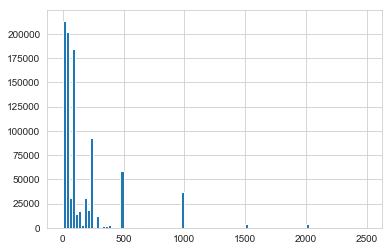

In [80]:
# Depending on the amount you can see if people are more likely to donate in exact increments
# 10 as opposed to 19 or whatever, which makes sense
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=100)
# number of each donation Less than 2500 dollar donations

In [81]:
#lets separate donations by party
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [84]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [86]:
#Let's separate obama from the party affiliation list
# 2 ways to do this with a loop or by sorting a dictionary of party affiliation, lets do the dictionary route.
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [87]:
#lets check that out and make sure that there are no negative donations (refunds)
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [88]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [92]:
#number of donors per candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [93]:
#sum of all the donations, not very readable for non math people
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [98]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i = 0

for don in cand_amount:
    print('The candidate %s raise %.0f dollars' %(cand_amount.index[i],don))
    print('\n')
    i += 1

The candidate Bachmann, Michelle raise 2711439 dollars


The candidate Cain, Herman raise 7101082 dollars


The candidate Gingrich, Newt raise 12832770 dollars


The candidate Huntsman, Jon raise 3330373 dollars


The candidate Johnson, Gary Earl raise 566962 dollars


The candidate McCotter, Thaddeus G raise 39030 dollars


The candidate Obama, Barack raise 135877427 dollars


The candidate Paul, Ron raise 21009620 dollars


The candidate Pawlenty, Timothy raise 6004819 dollars


The candidate Perry, Rick raise 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raise 373010 dollars


The candidate Romney, Mitt raise 88335908 dollars


The candidate Santorum, Rick raise 11043159 dollars




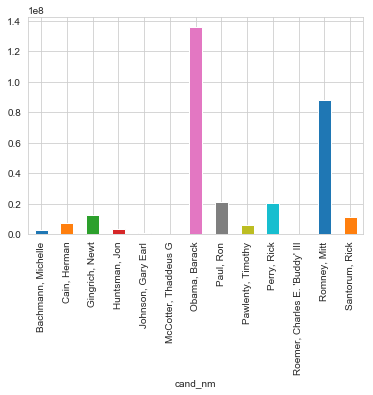

In [99]:
#Quick graphical representation
cand_amount.plot(kind='bar')

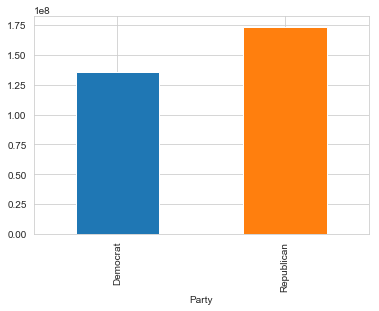

In [100]:
#lets compare obama vs all repub
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [105]:
#Donations and who they came from
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                    index='contbr_occupation',
                                    columns='Party',
                                    aggfunc='sum')
occupation_df.head(10)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000.0,2114.8


In [106]:
occupation_df.tail(10)

Party,Democrat,Republican
contbr_occupation,,
ZEPPOS AND ASSOCIATES,1000.0,NaN
ZIMMERMANS DAIRY,NaN,83.71
ZMS,NaN,70.12
ZOMBIE SLAYER,NaN,125.00
ZONE MANAGER,135.0,NaN
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.00


In [108]:
#45000 different occupations
occupation_df.shape

(45067, 2)

In [109]:
#let's set the minimal by group at 1 million dollars
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.shape

(31, 2)

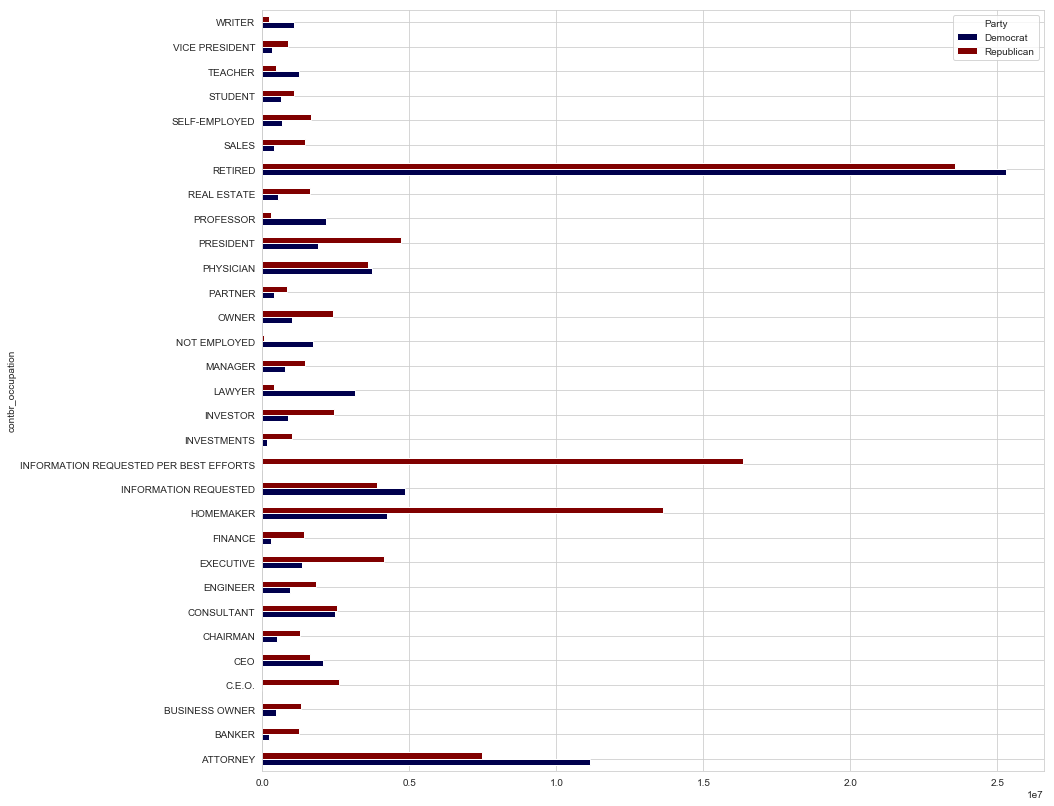

In [114]:
#31 groups donated 1 million or more
occupation_df.plot(kind='barh',figsize = (14,14),cmap = 'seismic')

In [118]:
# Lets get rid of info requests per best efforts
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [120]:
#lets then combine the 2 CEO columns and save changes 
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.',inplace=True)

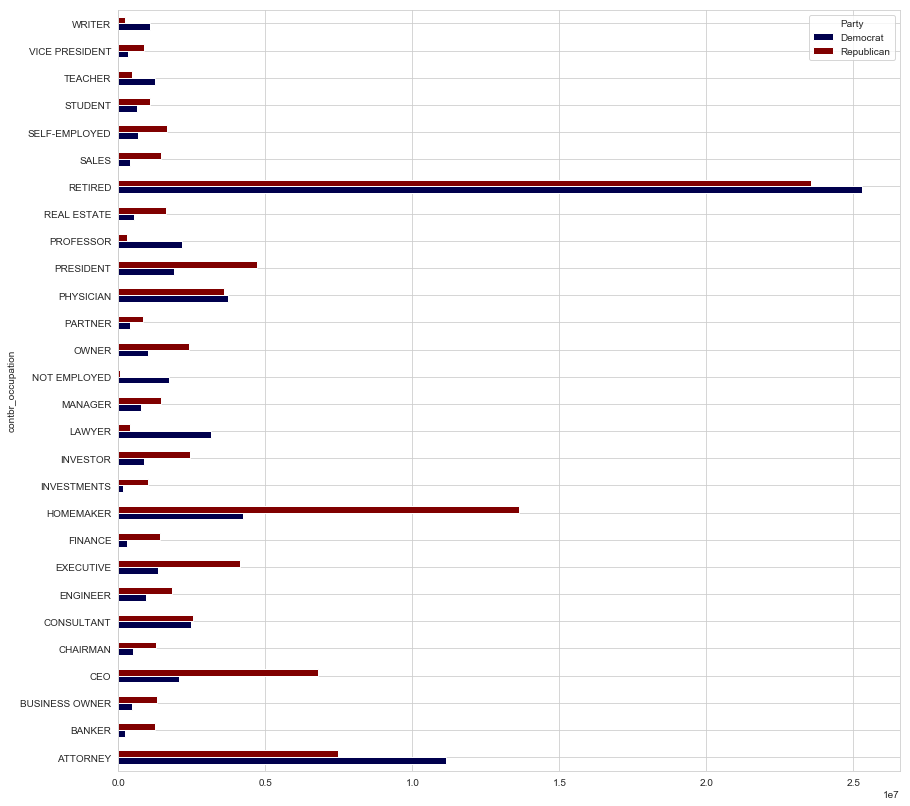

In [121]:
#Slightly Consolidated plot
occupation_df.plot(kind='barh',figsize = (14,14),cmap = 'seismic')